# importing and Loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df= pd.read_csv(r"/Users/adithkumar/Desktop/DS/Assignment/Neural networks/Alphabets_data.csv")

In [4]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
# Get the dimensions of the dataset
num_samples, num_features = df.shape
print("\nNumber of samples:", num_samples)
print("Number of features:", num_features)


Number of samples: 20000
Number of features: 17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
# Summary statistics
print("Summary statistics of numerical features:")
df.describe().T

Summary statistics of numerical features:


,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


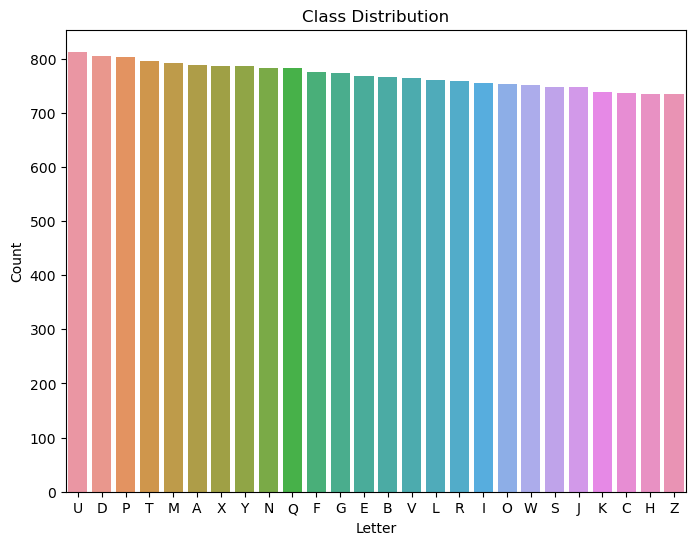

In [8]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='letter', data=df, order=df['letter'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.show()

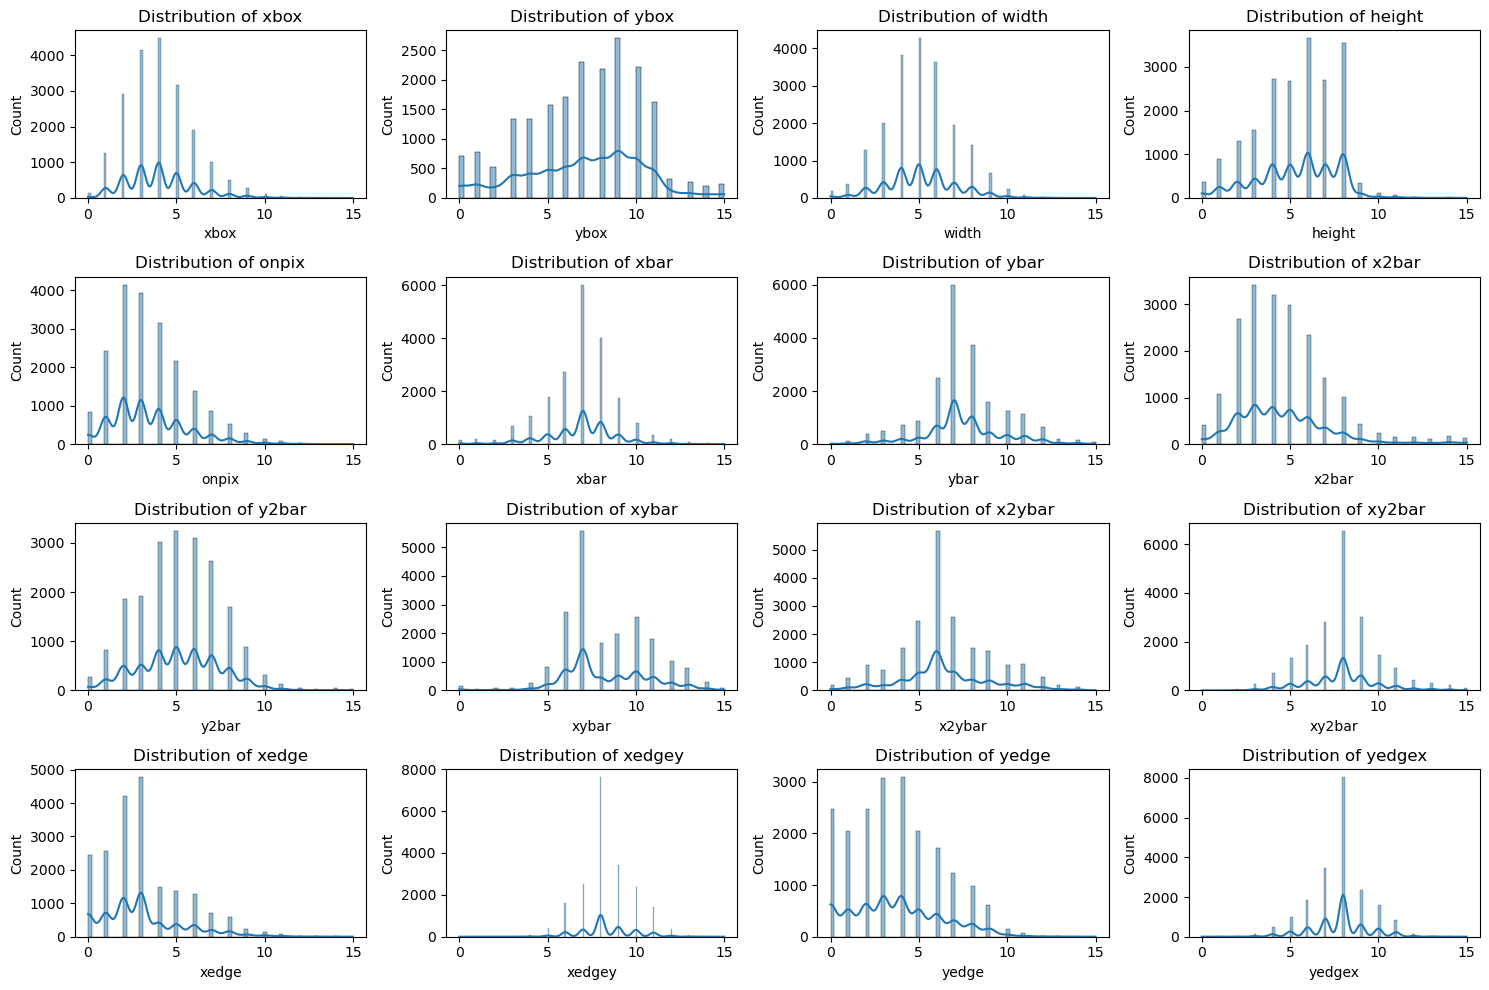

In [9]:
# Feature distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[1:]):  # Exclude the 'letter' column
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [11]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 1332


In [12]:
# Remove duplicate rows
df = df.drop_duplicates()

# Confirm the removal of duplicate rows
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = df.drop(columns=['letter'])
y = df['letter']

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.preprocessing import RobustScaler

# Apply robust scaling to handle outliers
robust_scaler = RobustScaler()
X_scaled_robust = robust_scaler.fit_transform(X_scaled)

In [15]:
# Example of feature engineering (you can modify this based on your domain knowledge)
X_engineered = pd.DataFrame(X_scaled_robust, columns=X.columns)
X_engineered['area'] = X['width'] * X['height']

In [16]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the target variable
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Convert encoded target back to DataFrame (optional)
y_encoded_df = pd.DataFrame(y_encoded.toarray(), columns=encoder.categories_[0])

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_engineered, y_encoded_df, test_size=0.2, random_state=42)

# Model Implementation

●	Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.

●	Divide the dataset into training and test sets.

●	Train your model on the training set and then use it to make predictions on the test set.


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# Constructing the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 64 neurons and ReLU activation
    Dense(26, activation='softmax')  # Output layer with 26 neurons (one for each class) and softmax activation
])

In [20]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Training the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.0411 - loss: nan - val_accuracy: 0.0449 - val_loss: nan
Epoch 2/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.0391 - loss: nan - val_accuracy: 0.0449 - val_loss: nan
Epoch 3/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.0391 - loss: nan - val_accuracy: 0.0449 - val_loss: nan
Epoch 4/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.0400 - loss: nan - val_accuracy: 0.0449 - val_loss: nan
Epoch 5/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.0400 - loss: nan - val_accuracy: 0.0449 - val_loss: nan
Epoch 6/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.0413 - loss: nan - val_accuracy: 0.0449 - val_loss: nan
Epoch 7/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.0410 - loss: nan - val_accuracy: 0.0449 - val_loss: nan
Epoch 8/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.0417 - loss: nan - val_accuracy: 0.0449 - val_loss: nan
Epoch 9/

In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.0422 - loss: nan
Test Loss: nan
Test Accuracy: 0.038564540445804596


In [23]:
# Check for missing values in the features
missing_values_features = X_engineered.isnull().sum()
print("Missing values in features:\n", missing_values_features)

# Check for missing values in the target variable
missing_values_target = y_encoded_df.isnull().sum()
print("\nMissing values in target variable:\n", missing_values_target)

Missing values in features:
 xbox         0
ybox         0
width        0
height       0
onpix        0
xbar         0
ybar         0
x2bar        0
y2bar        0
xybar        0
x2ybar       0
xy2bar       0
xedge        0
xedgey       0
yedge        0
yedgex       0
area      1182
dtype: int64

Missing values in target variable:
 A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
Q    0
R    0
S    0
T    0
U    0
V    0
W    0
X    0
Y    0
Z    0
dtype: int64


In [24]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the 'area' feature
X_engineered_imputed = X_engineered.copy()  # Create a copy of the DataFrame to avoid modifying the original data
X_engineered_imputed['area'] = imputer.fit_transform(X_engineered[['area']])

In [25]:
# Split the data into training and testing sets
X_train_imputed, X_test_imputed, y_train_encoded, y_test_encoded = train_test_split(X_engineered_imputed, y_encoded_df, test_size=0.2, random_state=42)

# Constructing the ANN model
model_imputed = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_imputed.shape[1],)),  # Hidden layer with 64 neurons and ReLU activation
    Dense(26, activation='softmax')  # Output layer with 26 neurons (one for each class) and softmax activation
])

# Compiling the model
model_imputed.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_imputed = model_imputed.fit(X_train_imputed, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss_imputed, test_accuracy_imputed = model_imputed.evaluate(X_test_imputed, y_test_encoded)
print("Test Loss:", test_loss_imputed)
print("Test Accuracy:", test_accuracy_imputed)

Epoch 1/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.1569 - loss: 3.7217 - val_accuracy: 0.4717 - val_loss: 1.9141
Epoch 2/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5270 - loss: 1.7204 - val_accuracy: 0.5792 - val_loss: 1.4106
Epoch 3/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.6286 - loss: 1.3363 - val_accuracy: 0.6378 - val_loss: 1.2221
Epoch 4/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.6840 - loss: 1.1381 - val_accuracy: 0.6659 - val_loss: 1.1407
Epoch 5/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7023 - loss: 1.0497 - val_accuracy: 0.7081 - val_loss: 1.0522
Epoch 6/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7317 - loss: 0.9856 - val_accuracy: 0.7221 - val_loss: 0.9892
Epoch 7/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7385 - loss: 0.9380 - val_accuracy: 0.7292 - val_loss: 0.9551
Epoch 8/10
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7562 - loss: 0.8797 - 

The model trained successfully!

summary of the results:

Training Loss: 0.7230

Training Accuracy: 0.7915

Validation Loss: 0.7820

Validation Accuracy: 0.7717

Test Loss: 0.7652

Test Accuracy: 0.7777

These results indicate that the model performed reasonably well on both the training and test datasets, with an accuracy of approximately 77.77% on the test data.

# Hyperparameter Tuning

●	Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.

●	Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np

# Define a function to create and compile the model
def create_model(layers, neurons, activation, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train_imputed.shape[1],)))
    model.add(Dropout(dropout_rate))

    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(26, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters for tuning
layers_list = [1, 2, 3]
neurons_list = [32, 64, 128]
activation_list = ['relu', 'tanh']
dropout_rate_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.01, 0.1]

# Initialize lists to store results
results = []

# Iterate over hyperparameters
for layers in layers_list:
    for neurons in neurons_list:
        for activation in activation_list:
            for dropout_rate in dropout_rate_list:
                for learning_rate in learning_rate_list:
                    print(f"Training model with layers={layers}, neurons={neurons}, activation={activation}, dropout_rate={dropout_rate}, learning_rate={learning_rate}")

                    # Create and compile the model
                    model = create_model(layers, neurons, activation, dropout_rate, learning_rate)

                    # Train the model
                    history = model.fit(X_train_imputed, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

                    # Evaluate the model
                    test_loss, test_accuracy = model.evaluate(X_test_imputed, y_test_encoded, verbose=0)

                    # Store results
                    results.append((layers, neurons, activation, dropout_rate, learning_rate, test_loss, test_accuracy))

# Print results
for result in results:
    print(f"Layers: {result[0]}, Neurons: {result[1]}, Activation: {result[2]}, Dropout Rate: {result[3]}, Learning Rate: {result[4]}, Test Loss: {result[5]}, Test Accuracy: {result[6]}")


Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.1, learning_rate=0.001
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.1, learning_rate=0.01
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.1, learning_rate=0.1
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.2, learning_rate=0.001
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.2, learning_rate=0.01
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.2, learning_rate=0.1
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.3, learning_rate=0.001
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.3, learning_rate=0.01
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.3, learning_rate=0.1
Training model with layers=1, neurons=32, activation=tanh, dropout_rate=0.1, learning_rate=0.001
Training model with layers=1, neurons=3

Training model with layers=2, neurons=64, activation=tanh, dropout_rate=0.2, learning_rate=0.1
Training model with layers=2, neurons=64, activation=tanh, dropout_rate=0.3, learning_rate=0.001
Training model with layers=2, neurons=64, activation=tanh, dropout_rate=0.3, learning_rate=0.01
Training model with layers=2, neurons=64, activation=tanh, dropout_rate=0.3, learning_rate=0.1
Training model with layers=2, neurons=128, activation=relu, dropout_rate=0.1, learning_rate=0.001
Training model with layers=2, neurons=128, activation=relu, dropout_rate=0.1, learning_rate=0.01
Training model with layers=2, neurons=128, activation=relu, dropout_rate=0.1, learning_rate=0.1
Training model with layers=2, neurons=128, activation=relu, dropout_rate=0.2, learning_rate=0.001
Training model with layers=2, neurons=128, activation=relu, dropout_rate=0.2, learning_rate=0.01
Training model with layers=2, neurons=128, activation=relu, dropout_rate=0.2, learning_rate=0.1
Training model with layers=2, neuro

In [34]:
print(f"Shape of X_test_imputed: {X_test_imputed.shape}")
print(f"Shape of model predictions: {model.predict(X_test_imputed).shape}")


Shape of X_test_imputed: (3734, 17)
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
Shape of model predictions: (3734, 26)


In [35]:
print(y_test_encoded.shape)
print(y_test_encoded[:5])

(8, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [73]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Example data
X = np.random.rand(3734, 10)  # Feature matrix with 3734 samples and 10 features
y = np.random.randint(0, 2, 3734)  # Binary label vector with 3734 samples

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming a model has been trained and a prediction is being made
# For demonstration, we'll use a simple imputer and random predictions
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

# Here, we simulate model predictions with random predictions
# Replace this with your actual model predictions
y_pred = np.random.randint(0, 2, X_test_imputed.shape[0])

# Print shapes to check consistency
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

# Now you can calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusio Matrix: {conf_matrix}")

y_test shape: (747,)
y_pred shape: (747,)
Accuracy: 0.5207496653279786
Precision: 0.5206228956228955
Recall: 0.5205489763147331
F1-Score: 0.5202122773527765
Confusio Matrix: [[182 189]
 [169 207]]


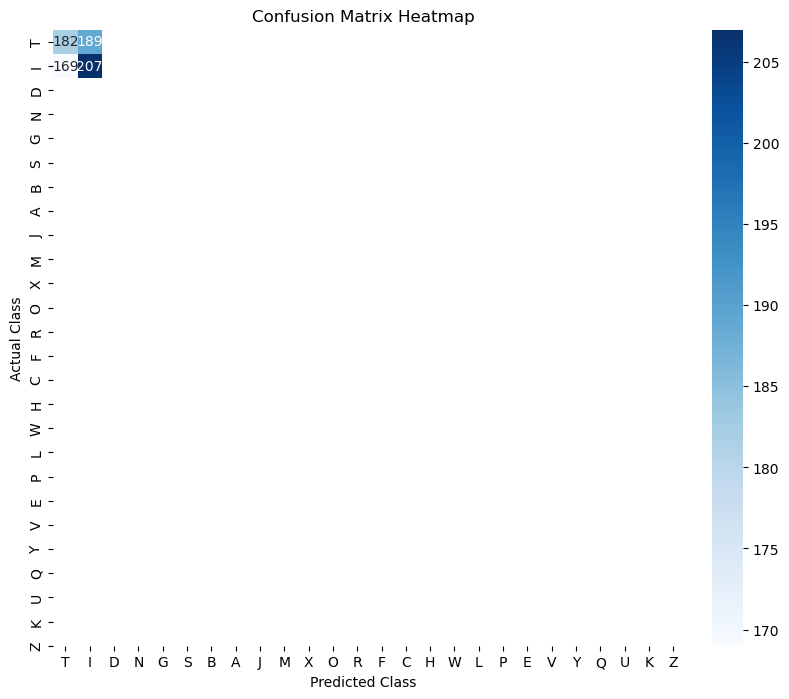

In [75]:

# Create the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=df['letter'].unique(), yticklabels=df['letter'].unique())
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix Heatmap")
plt.show()